Importing Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Importing Dataset

In [2]:
Train_df = pd.read_csv(r"C:\Users\Annie\Documents\DATASETS AND PRACTISES\Train.csv")
Test_df = pd.read_csv(r"C:\Users\Annie\Documents\DATASETS AND PRACTISES\Test.csv")
Train_df
Test_df                      

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1


Exploratory Data Analysis

In [3]:
Train_df.info()
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  ----

In [4]:
Train_df.head()
Test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [5]:
Train_df.tail()
Test_df.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,10.5,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.6,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.3,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1
5680,9.5,Regular,0.104720,Canned,79.7960,2002,NaN,Tier 2,Supermarket Type1


In [6]:
Train_df.describe()
Test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Data Cleaning

In [7]:
Train_df.duplicated()
Test_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5681, dtype: bool

In [8]:
Train_df.drop_duplicates
Test_df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Item_Weight Item_Fat_Content  Item_Visibility           Item_Type  \
0          20.750          Low Fat         0.007565         Snack Foods   
1           8.300          Regular         0.038428               Dairy   
2          14.600          Low Fat         0.099575              Others   
3           7.315          Low Fat         0.015388         Snack Foods   
4             NaN          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676       10.500          Regular         0.013496         Snack Foods   
5677        7.600          Regular         0.142991       Starchy Foods   
5678       10.000          Low Fat         0.073529  Health and Hygiene   
5679       15.300          Regular         0.000000              Canned   
5680        9.500          Regular         0.104720              Canned   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Ou

In [9]:
Train_df.isnull().sum()
Test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
Tn_df = Train_df["Item_Weight"].mean()
Tt_df = Test_df["Item_Weight"].mean()
Train_df["Item_Weight"].fillna(Tn_df, inplace = True)
Test_df["Item_Weight"].fillna(Tt_df, inplace = True)

In [11]:
Train_df.isnull().sum()
Test_df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
df_tr = Train_df["Outlet_Size"].mode()[0]
df_ts = Train_df["Outlet_Size"].mode()[0]
Train_df["Outlet_Size"].fillna(df_tr, inplace=True)
Test_df["Outlet_Size"].fillna(df_ts, inplace=True)
Train_df
Test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [13]:
Train_df.isnull().sum()
Test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Model Building

AttributeError: module 'seaborn' has no attribute 'histoplot'

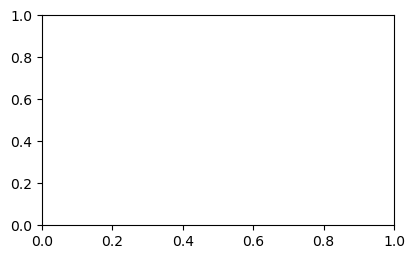

In [14]:
# Train the model
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histoplot(Train_df['Item_Weight'],kde=True, bins=20)
plt.title('Histogram of Dataset')


plt.subplot(2,2,2)
sns.histoplot(Test_df['Item_Weight'], kde=True, bins=20)
plt.title('Histogram of Dataset2')